In [8]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import np_utils
np.set_printoptions(threshold=np.inf) #show all array
np.random.seed(10)

In [12]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [65]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype("float32")
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype("float32")

In [66]:
x_Train4D_normalize = x_Train4D/ 255
x_Test4D_normalize = x_Test4D/ 255

In [67]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(filters = 16,
                kernel_size = (5, 5),
                padding = "same",
                input_shape = (28, 28, 1),
                activation = "relu"))

In [33]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [34]:
model.add(Conv2D(filters = 36,
                kernel_size = (5, 5),
                padding = "same",
                activation = "relu"))

In [35]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [36]:
model.add(Dropout(0.25))

In [37]:
model.add(Flatten())

In [38]:
model.add(Dense(128, activation = "relu"))

In [39]:
model.add(Dropout(0.5))

In [40]:
model.add(Dense(10, activation = "softmax"))

In [41]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               225920    
__________

In [42]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

In [47]:
train_history = model.fit(x = x_Train4D_normalize,
                         y = y_TrainOneHot, validation_split = 0.2,
                         epochs = 10, batch_size = 300, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 32s - loss: 0.5086 - acc: 0.8431 - val_loss: 0.0940 - val_acc: 0.9709
Epoch 2/10
 - 31s - loss: 0.1352 - acc: 0.9597 - val_loss: 0.0651 - val_acc: 0.9818
Epoch 3/10
 - 31s - loss: 0.1002 - acc: 0.9707 - val_loss: 0.0539 - val_acc: 0.9838
Epoch 4/10
 - 32s - loss: 0.0787 - acc: 0.9765 - val_loss: 0.0429 - val_acc: 0.9868
Epoch 5/10
 - 35s - loss: 0.0653 - acc: 0.9804 - val_loss: 0.0407 - val_acc: 0.9874
Epoch 6/10
 - 33s - loss: 0.0588 - acc: 0.9827 - val_loss: 0.0360 - val_acc: 0.9898
Epoch 7/10
 - 33s - loss: 0.0523 - acc: 0.9841 - val_loss: 0.0370 - val_acc: 0.9894
Epoch 8/10
 - 33s - loss: 0.0473 - acc: 0.9858 - val_loss: 0.0314 - val_acc: 0.9910
Epoch 9/10
 - 33s - loss: 0.0421 - acc: 0.9863 - val_loss: 0.0352 - val_acc: 0.9892
Epoch 10/10
 - 33s - loss: 0.0395 - acc: 0.9879 - val_loss: 0.0320 - val_acc: 0.9913


In [52]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc = "upper left")
    plt.show()

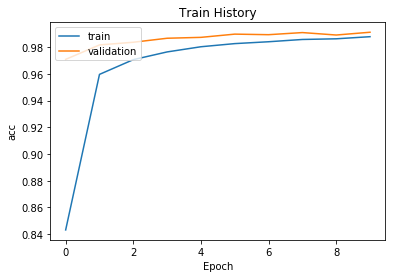

In [54]:
show_train_history(train_history, "acc", "val_acc")

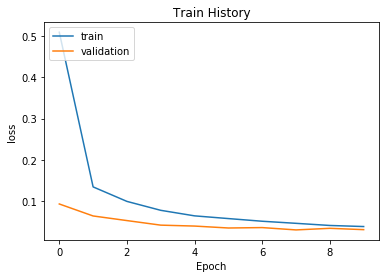

In [55]:
show_train_history(train_history, "loss", "val_loss")

In [69]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 247us/step


0.9917

In [71]:
prediction = model.predict_classes(x_Test4D_normalize)
prediction

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 3, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

In [72]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [1]:
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if(num > 25):
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap = "binary")
        title = "label=" + str(labels[idx])
        if(len(prediction) > 0):
            title +=", predict=" + str(prediction[idx])
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx +=1
    plt.show()

In [3]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx = 0)

NameError: name 'x_Test' is not defined

In [76]:
pd.crosstab(y_Test, prediction,
           rownames = ["label"], colnames = ["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1132,1,1,0,0,0,1,0,0
2,1,1,1027,0,0,0,0,2,1,0
3,0,0,1,1007,0,1,0,0,1,0
4,0,0,0,0,976,0,1,0,0,5
5,1,0,0,9,0,880,1,0,0,1
6,4,2,0,0,1,1,950,0,0,0
7,0,2,5,1,0,0,0,1019,0,1
8,2,0,3,4,0,1,0,2,959,3
